In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
df=pd.read_csv('/content/Airbnb_Open_Data.csv',low_memory=False)

In [22]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [24]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [25]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include="all"))


Shape of dataset: (102599, 26)

Columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Missing Values:
 id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy     

In [26]:
if "license" in df.columns:
    df = df.drop(columns=["license"])

In [27]:
df["reviews per month"] = df["reviews per month"].fillna(0)
df["last review"] = df["last review"].fillna("No Review")

In [28]:
# Clean 'price' and 'service fee' columns and convert to numeric
df['price'] = df['price'].astype(str).str.replace('[$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)

df['service fee'] = df['service fee'].astype(str).str.replace('[$,]', '', regex=True)
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce').fillna(0)


print("\nRoom Type Distribution:\n", df["room type"].value_counts())
print("\nAverage Price by Neighbourhood Group:\n",
      df.groupby("neighbourhood group")["price"].mean())

print("\nAverage Price by Room Type:\n",
      df.groupby("room type")["price"].mean())

print("\nTop 10 Hosts with Most Listings:\n",
      df["host name"].value_counts().head(10))


Room Type Distribution:
 room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

Average Price by Neighbourhood Group:
 neighbourhood group
Bronx            626.146018
Brooklyn         625.169566
Manhattan        620.876735
Queens           628.640084
Staten Island    622.528796
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

Average Price by Room Type:
 room type
Entire home/apt    623.534106
Hotel room         668.465517
Private room       623.584329
Shared room        631.853100
Name: price, dtype: float64

Top 10 Hosts with Most Listings:
 host name
Michael         881
David           764
John            581
Alex            546
Sonder (NYC)    516
Daniel          473
Karen           439
Sarah           434
Maria           426
Anna            400
Name: count, dtype: int64


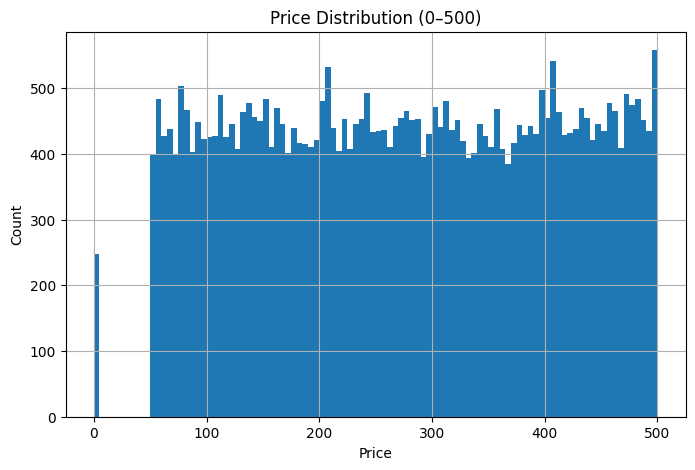

In [29]:
# Price distribution
plt.figure(figsize=(8, 5))
df["price"].hist(bins=100, range=(0, 500))
plt.title("Price Distribution (0–500)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

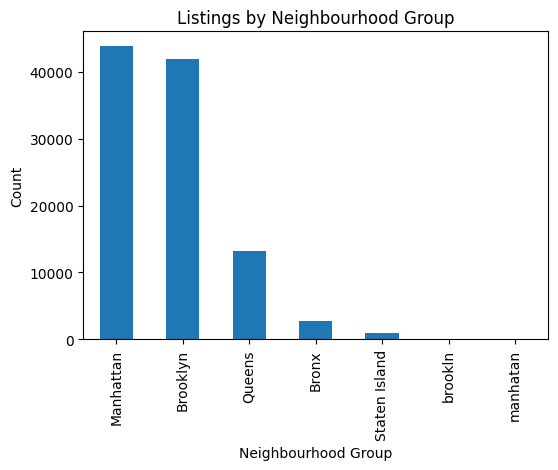

In [30]:
# Listings by neighbourhood group
plt.figure(figsize=(6, 4))
df["neighbourhood group"].value_counts().plot(kind="bar")
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

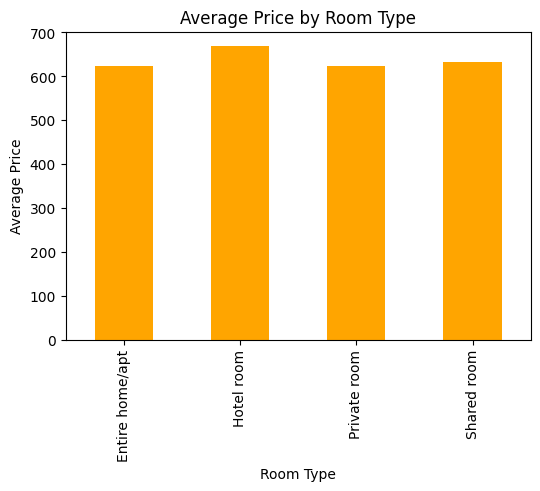

In [31]:
# Average price by room type
plt.figure(figsize=(6, 4))
df.groupby("room type")["price"].mean().plot(kind="bar", color="orange")
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()

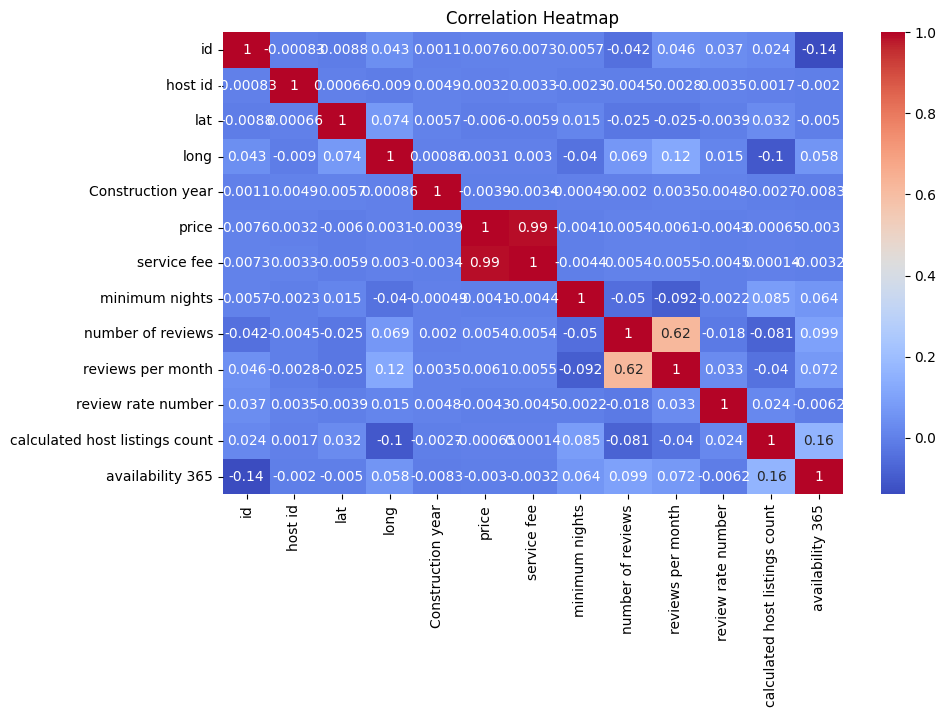

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()